In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score ,mean_absolute_error, mean_squared_error

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
%matplotlib inline

df=pd.read_csv("/content/car_price_prediction.csv")
df.head()


ID  Price  Levy Manufacturer    Model  Prod. year   Category  \
0  45654403  13328  1399        LEXUS   RX 450        2010       Jeep   
1  44731507  16621  1018    CHEVROLET  Equinox        2011       Jeep   
2  45774419   8467     -        HONDA      FIT        2006  Hatchback   
3  45769185   3607   862         FORD   Escape        2011       Jeep   
4  45809263  11726   446        HONDA      FIT        2014  Hatchback   

  Leather interior Fuel type Engine volume    Mileage  Cylinders  \
0              Yes    Hybrid           3.5  186005 km        6.0   
1               No    Petrol             3  192000 km        6.0   
2               No    Petrol           1.3  200000 km        4.0   
3              Yes    Hybrid           2.5  168966 km        4.0   
4              Yes    Petrol           1.3   91901 km        4.0   

  Gear box type Drive wheels   Doors             Wheel   Color  Airbags  
0     Automatic          4x4  04-May        Left wheel  Silver       12  
1     Tiptronic          4x4  04-May        Left wheel   Black        8  
2      Variator        Front  04-May  Right-hand drive   Black        2  
3     Automatic          4x4  04-May        Left wheel   White        0  
4     Automatic        Front  04-May        Left wheel  Silver        4

In [ ]:
print(f"Datasett Shape {df.shape}")

Datasett Shape (19237, 18)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [ ]:
#checking duplicates
df.duplicated().sum()

313

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.describe().T

count          mean            std         min         25%  \
ID          18924.0  4.557538e+07  937546.823889  20746880.0  45695007.5   
Price       18924.0  1.858744e+04  192135.630726         1.0      5331.0   
Prod. year  18924.0  2.010914e+03       5.665749      1939.0      2009.0   
Cylinders   18924.0  4.580216e+00       1.200223         1.0         4.0   
Airbags     18924.0  6.568379e+00       4.322323         0.0         4.0   

                   50%          75%         max  
ID          45771914.5  45801742.25  45816654.0  
Price          13172.0     22063.00  26307500.0  
Prod. year      2012.0      2015.00      2020.0  
Cylinders          4.0         4.00        16.0  
Airbags            6.0        12.00        16.0

In [ ]:
df.drop('ID',axis=1,inplace=True)
# Replacing '-' with null
df['Levy'].replace({'-':np.nan}, inplace = True)
# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float64')

df['Engine volume']=df['Engine volume'].apply(lambda x: x.replace('Turbo',''))
df['Engine volume']=df['Engine volume'].astype(dtype='float')

df['Mileage']=df['Mileage'].apply(lambda x: x.replace('km',''))
df['Mileage']=df['Mileage'].astype(dtype='int')

df['Doors']=df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5})

In [ ]:
df.isna().sum()

Price                  0
Levy                5709
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [ ]:
df.corrwith(df['Price']).abs().sort_values(ascending=False)

Price            1.000000
Levy             0.065458
Doors            0.033387
Airbags          0.012709
Prod. year       0.012689
Engine volume    0.008888
Cylinders        0.007435
Mileage          0.001763
dtype: float64

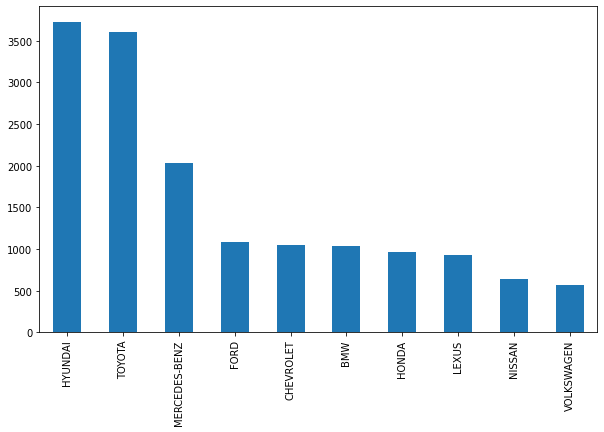

In [ ]:
plt.figure(figsize=(10,6))
df['Manufacturer'].value_counts()[:10].plot(kind='bar')
plt.show()

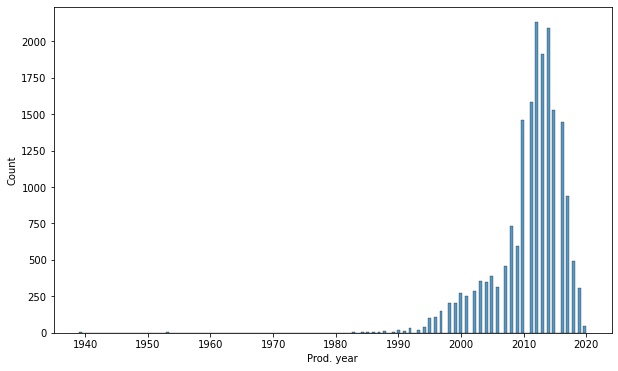

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(data=df['Prod. year'])
plt.show()

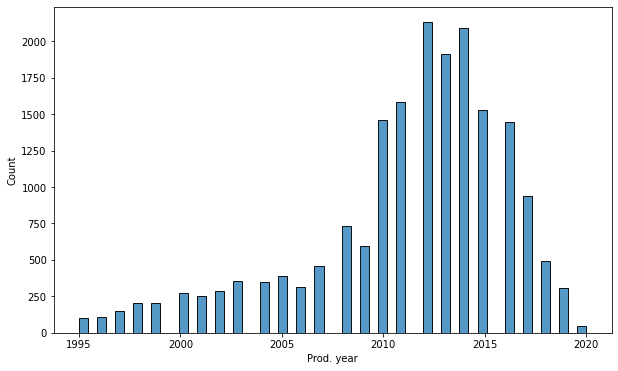

In [ ]:
idx=df[df['Prod. year']<1995].index
df.drop(idx,axis=0,inplace=True)

plt.figure(figsize=(10,6))
sns.histplot(df['Prod. year'])
plt.show()

In [ ]:
idx=df[df['Mileage']>10_000_00].index 
df.drop(idx,axis=0,inplace=True)
idx=df[df['Price']>5_000_00].index 
df.drop(idx,axis=0,inplace=True)

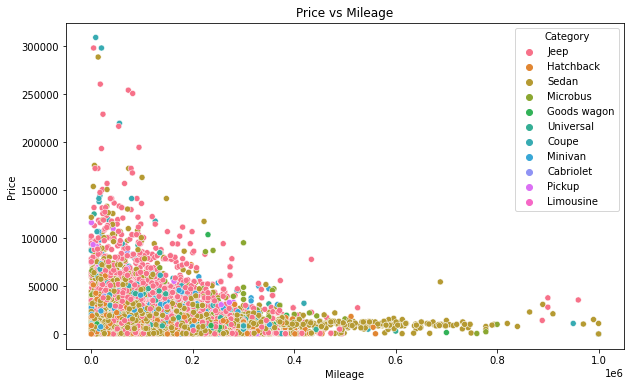

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='Mileage',y='Price',hue='Category')
plt.title("Price vs Mileage")
plt.show()

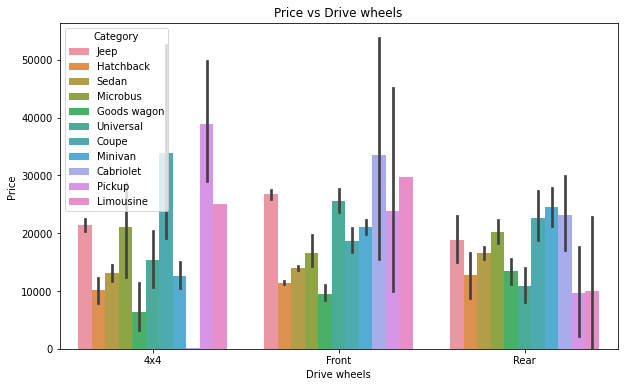

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x='Drive wheels',y='Price',hue='Category')
plt.title("Price vs Drive wheels")
plt.show()

In [ ]:
df.corrwith(df['Price']).sort_values(ascending=False)

Price            1.000000
Prod. year       0.301996
Engine volume    0.136050
Cylinders        0.103306
Levy             0.081976
Doors            0.007072
Airbags         -0.024845
Mileage         -0.208223
dtype: float64

In [ ]:
X=df[df.columns[1:]]
y=df[df.columns[0]].values
X_cats=[]
X_nums=[]

for col in X.columns:
    if X[col].dtypes=='object':
        X_cats.append(col)
    else:
        X_nums.append(col)
        
X_nums=df[X_nums]
X_cats=df[X_cats]

In [ ]:
num_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [ ]:
X_cats.drop(labels=['Manufacturer', 'Model'],axis=1,inplace=True)
X_cats=pd.get_dummies(X_cats)

In [ ]:
X=pd.concat([X_nums,X_cats],axis=1)
X=num_pipeline.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
LR_model=LinearRegression()
LR_model.fit(X_train,y_train)
predict=LR_model.predict(X_test)

print("Linear Regression")
print(f"MSE:       " ,np.sqrt(mean_squared_error(y_test,predict)))
print(f"MAE:       "  ,mean_absolute_error(y_test,predict))
print("R2 score:  ",  r2_score(y_test,predict))

Linear Regression
MSE:        16379.067622103348
MAE:        10367.885851579967
R2 score:   0.29364881409135246


In [ ]:
RF_model=RandomForestRegressor()
RF_model.fit(X_train,y_train)
predict=RF_model.predict(X_test)
print('RandomForestRegressor')
print(f"MSE:       " ,np.sqrt(mean_squared_error(y_test,predict)))
print(f"MAE:       "  ,mean_absolute_error(y_test,predict))
print("R2 score:  ",  r2_score(y_test,predict))

RandomForestRegressor
MSE:        9659.477320381407
MAE:        4675.653969788997
R2 score:   0.7543314395100621


In [ ]:
DT_model=DecisionTreeRegressor()
DT_model.fit(X_train,y_train)
predict=DT_model.predict(X_test)
print('DecisionTreeRegressor')
print(f"MSE:       " ,np.sqrt(mean_squared_error(y_test,predict)))
print(f"MAE:       "  ,mean_absolute_error(y_test,predict))
print("R2 score:  ",  r2_score(y_test,predict))

DecisionTreeRegressor
MSE:        13065.743696990658
MAE:        5856.890915040004
R2 score:   0.5505197682996765


In [ ]:
KN_model=KNeighborsRegressor()
KN_model.fit(X_train,y_train)
predict=KN_model.predict(X_test)
print('KN_model')
print(f"MSE:       " ,np.sqrt(mean_squared_error(y_test,predict)))
print(f"MAE:       "  ,mean_absolute_error(y_test,predict))
print("R2 score:  ",  r2_score(y_test,predict))

KN_model
MSE:        13003.013308026933
MAE:        6473.664716930507
R2 score:   0.5548254372092938
